# Building on top of established architectures
- So far we have looked at how to build our models from scratch, and a little bit about what to do, and what not to do when doing that
- Today we will look at a set of common architectures and get you comfortable with using them


## Terminology
**Pre-trained model**

- A neural network which has been trained on a dataset already (usually to convergence)
- When doing image classification this often means the model was trained on ImageNet (natural image classification)

**Fine Tuning**

- Fine tuning is the process of slightly modifying a pre-trained model, often times to adapt it on a new task. There are many variants of fine-tuning.
- Sometimes fine tuning could mean using the model as a *feature extractor* (more on this later) and training a new layer to make sense of those features
- It could also mean optimizing the entire model at once, but starting from the pre-trained weights
    - This is also called "warm starting" a model


**Training from scratch**

- As the name implies, this means not starting with any prior about your model weights
    - Sidenote, what is a prior?
- We use an existing architecture, but initialize all the weights randomly
    - This is only an acceptable option when you have enough training data


## Common Image Classification Architectures
None of these are currently SOTA, but they were important milestones in architecture development.

### AlexNet
- Named after the grad student who created it (Alex Krizhevsky)

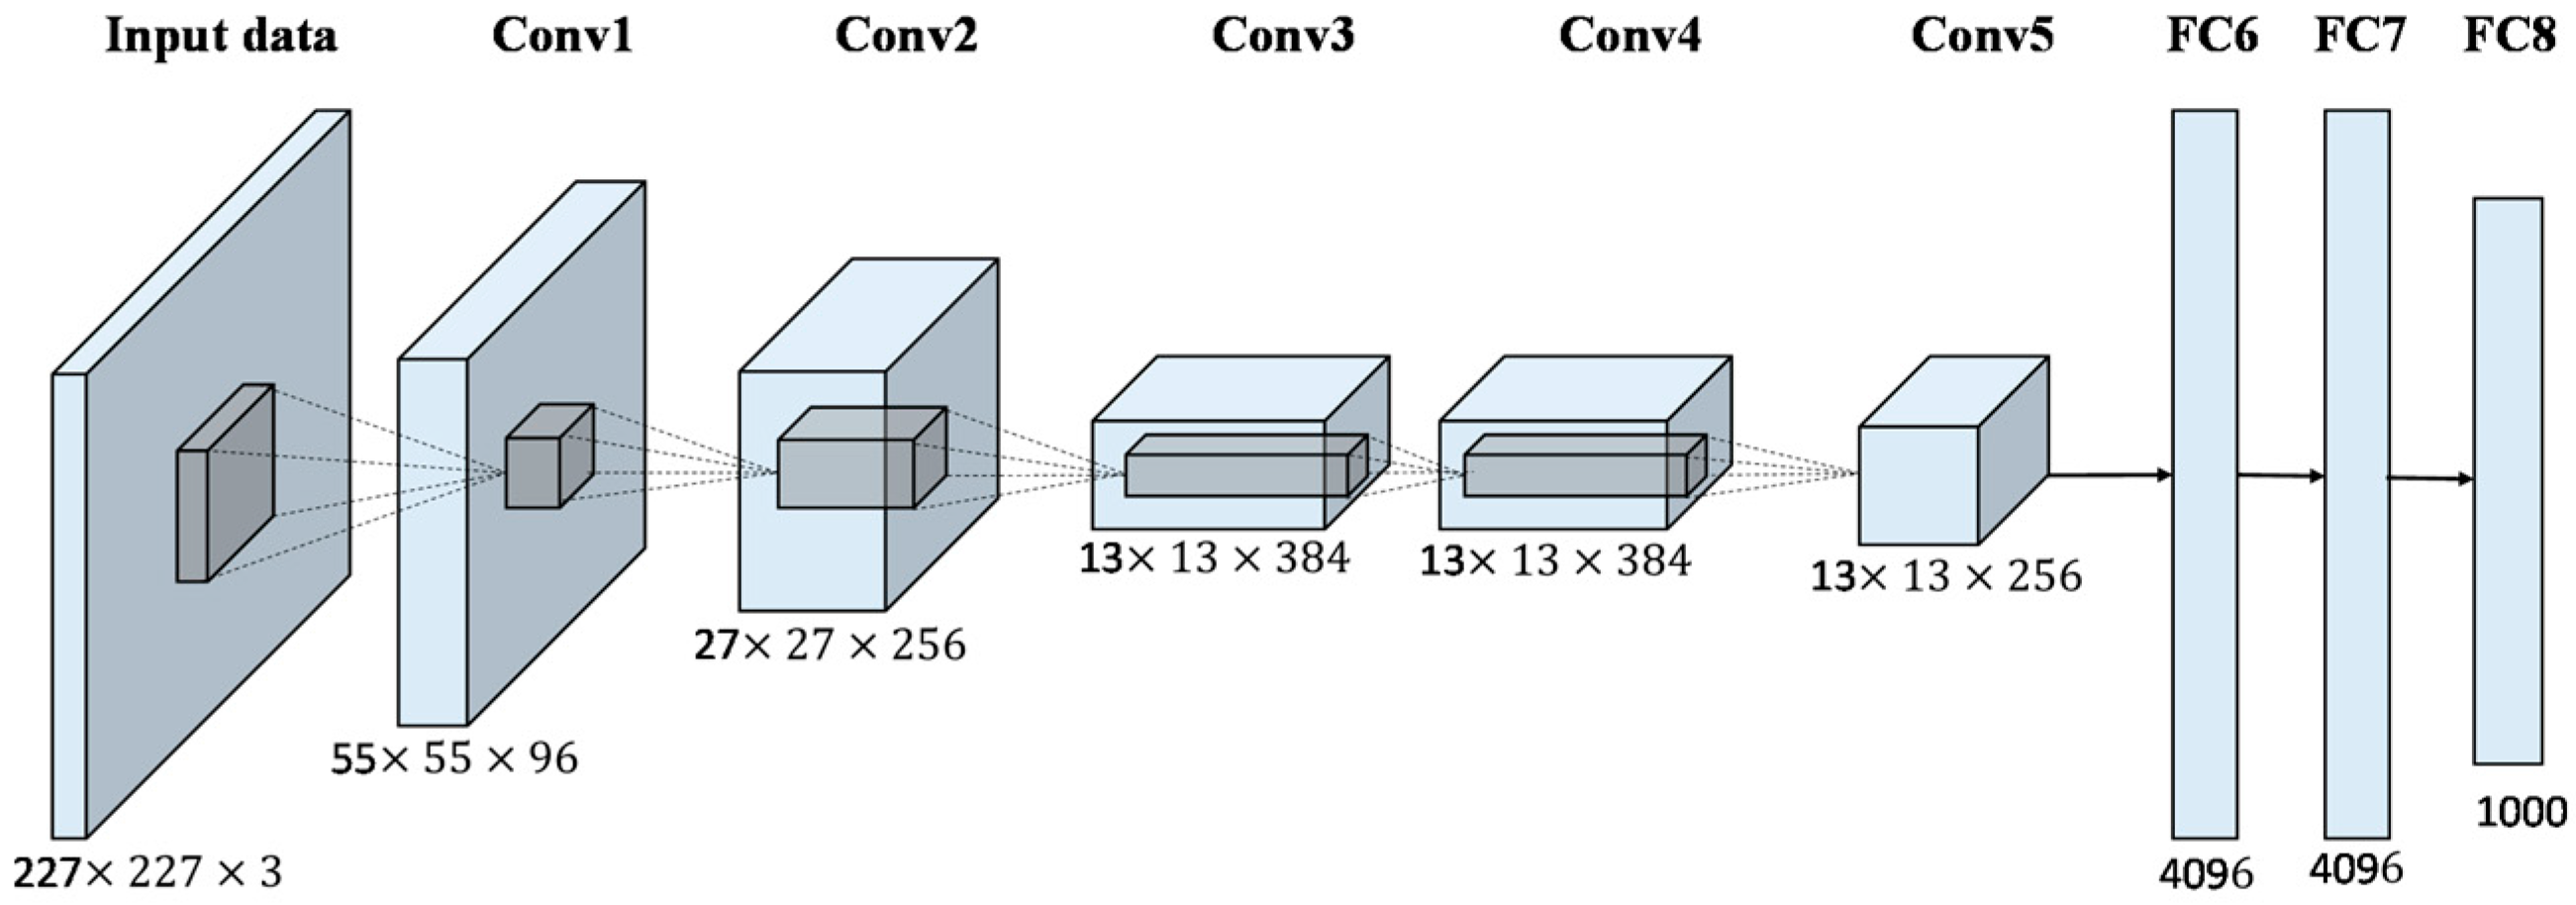

## VGG16/19
From the Visual Geometry Group at Oxford back in 2015

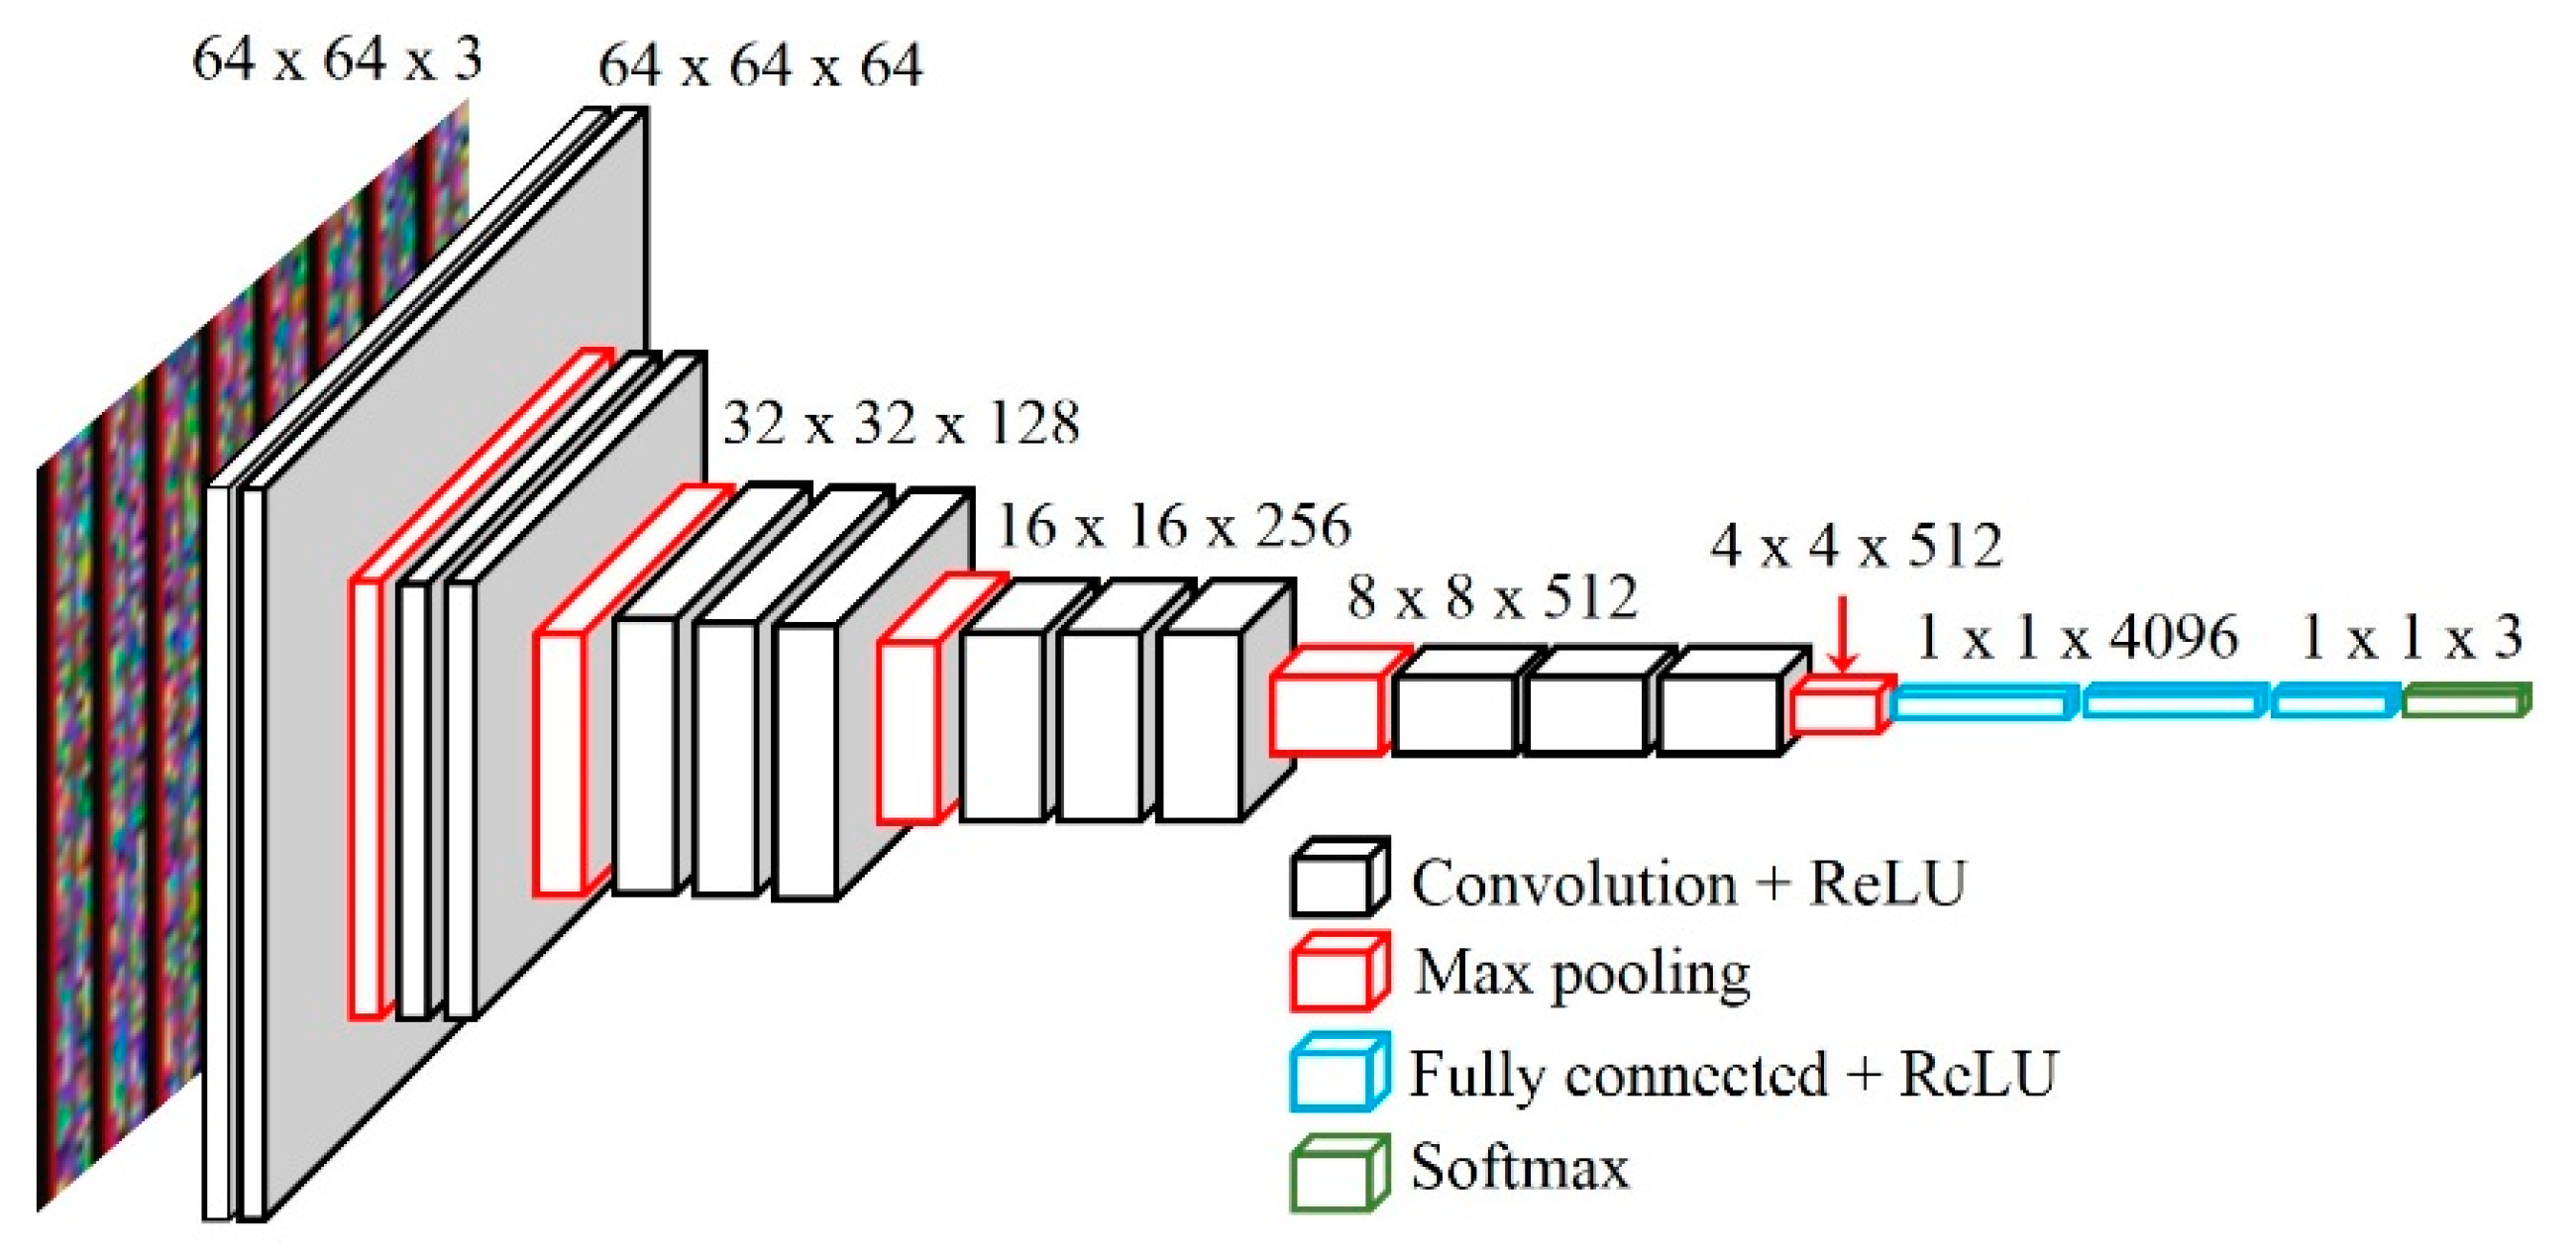


## Inception
From the Google AI research group

- Probably peak "just add more layers" hype for neural architecture research

Also things are getting unweildy to visualize....
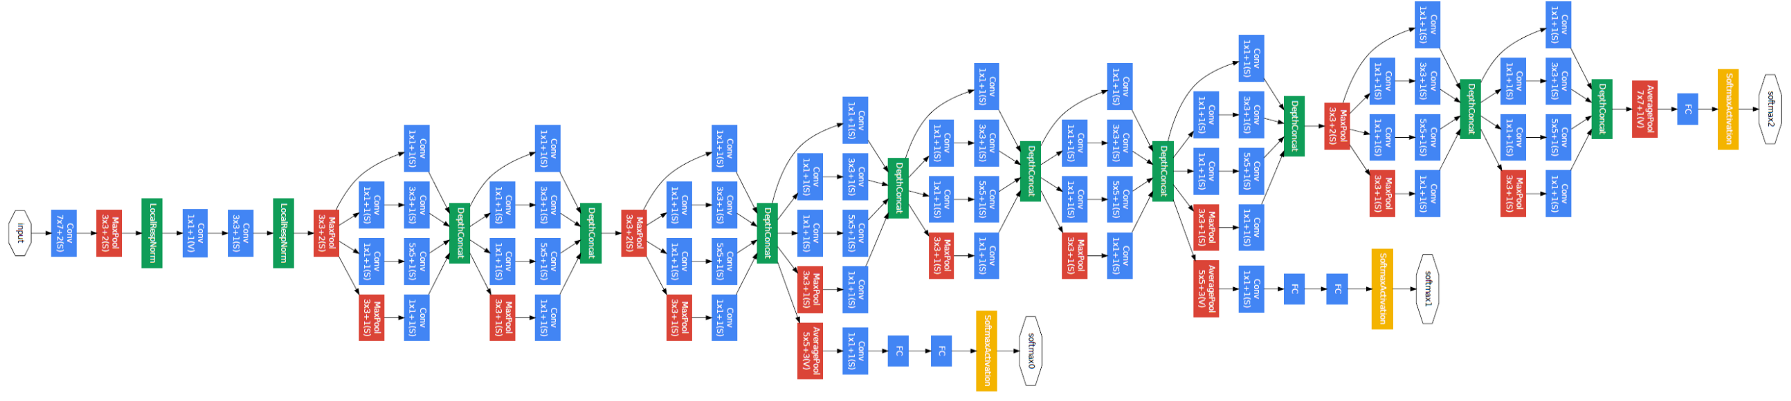

Before moving on, lets take a closer look at what Inception was doing.

- Inception was one of the deepest architecture at the time, but also contained the new feature of doing multiple convolutions at the same time (1x1 + 3x3 + 5x5)
    - This was a feature of inception
    - Inception v2 showed that is wasn't actually necesasry
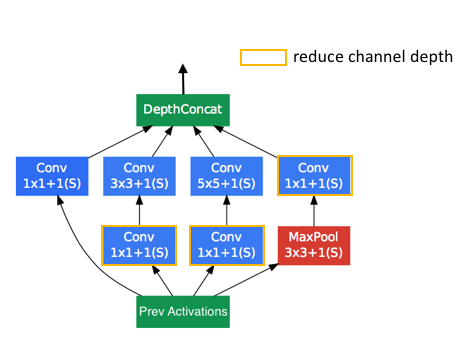

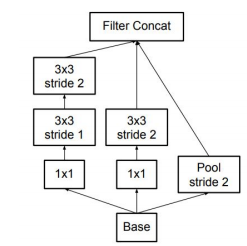

**Aside**
Why do 3x3 convs reign supreme? It's because by stacking them you can do any arbitrary (MxN) convolution, but with more power!


## DenseNets
From Cornell, Tsinghua, and Facebook

- Closer to current SOTA
- Can't show the entire architecture (too large)

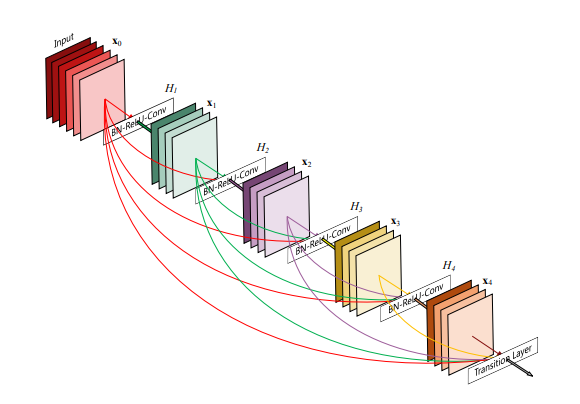





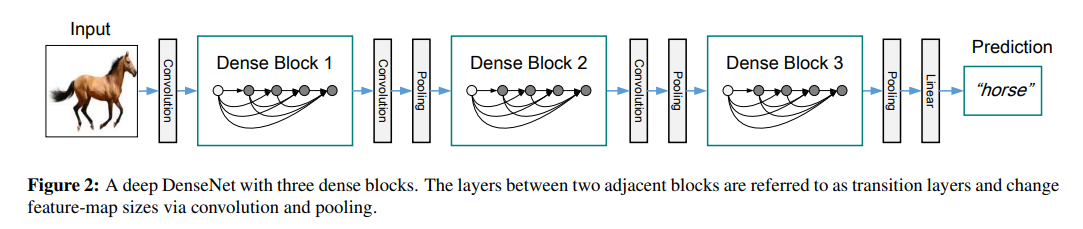

- Uses "dense blocks" which have a ton of interconnects between convolutional blocks
- Dense blocks allow for multi-scale reasoning of features, and help with gradient propagation from layer-to-layer

Text(0, 0.5, 'Top-1 Accuracy')

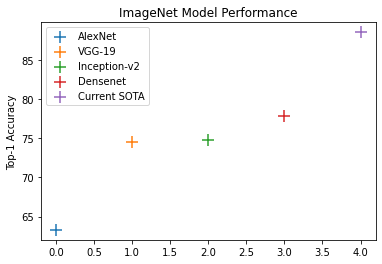

In [4]:
import matplotlib.pyplot as plt
names = ["AlexNet", "VGG-19", "Inception-v2", "Densenet", "Current SOTA"]
imagenet_top_1 = [63.3, 74.5, 74.8,  77.85, 88.5]
plt.figure()
for i in range(5):
    plt.scatter([i], imagenet_top_1[i:i+1], label=names[i], s=128, marker='+')
plt.legend()
plt.title("ImageNet Model Performance")
plt.ylabel("Top-1 Accuracy")

## How to use these architectures?

Using keras it is extremelly easy to use these architectures. You can find the docs here: https://www.tensorflow.org/api_docs/python/tf/keras/applications

- It doesn't have "AlexNet", because nobody actually uses it anymore (not powerful)

### Keyword Arguments
```
tf.keras.applications.InceptionV3(
    include_top=True, weights='imagenet', input_tensor=None, input_shape=None,
    pooling=None, classes=1000, classifier_activation='softmax'
)
```

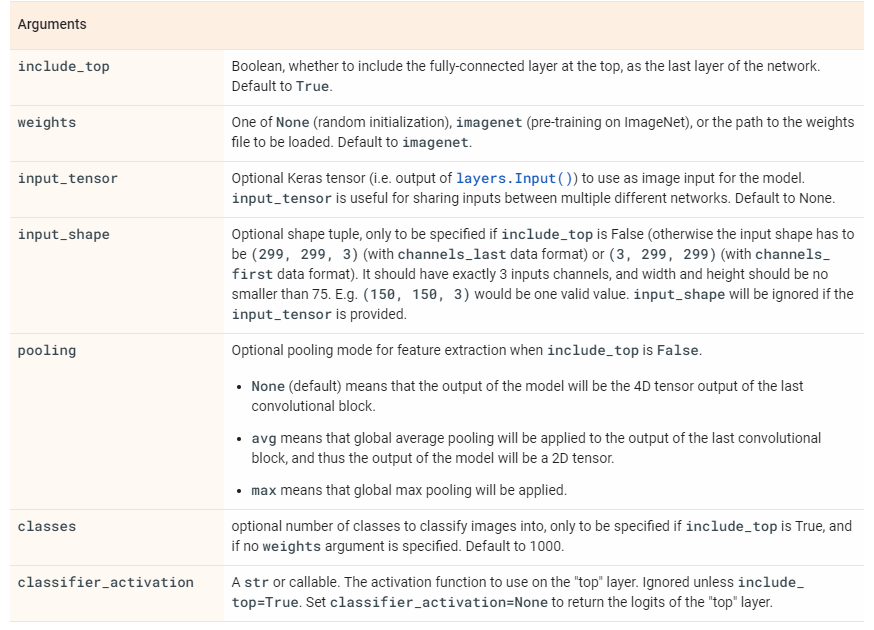





### Note about pre-trained models

When using pre-trained models you need to match the dimensions of the images it was trained on. Many of the operations in the model are resolution dependent (mostly the FC layers), so if you change the resolution of the image, the pre-trained weights are no longer valid.

A common way to do this is to simply up/down sample your images to the appropriate resolution (i.e 224x224)

## Exercises

### 1. Single Image Prediction with a Pre-trained Model
- To get started we will do the simple task of classifying a random image from the internet using a pre-trained model
    - You can use whatever image you want, but an example is provided
    - The code is written to use a direct URL

### 2. Fine tuning a pre-trained model on Cats vs. Dogs
- We will fine tune our model now on a new dataset

### 3. Fine tuning a pre-trained model on biomedical images

### 4. [OPTIONAL] Re-training a model for biomedical image analysis



In [9]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image

# Exercise 1
- Run the example code below and validate if the output makes sense

In [ ]:
IMAGE_URL = 'https://deepimaging.github.io/data/cat_photo.jpg'
example_file = tf.keras.utils.get_file('image.jpg', IMAGE_URL)
example_image = Image.open(example_file).resize((224, 224))
example_image

In [ ]:
example_input = np.array(example_image) / 255.0
model = tf.keras.applications.DenseNet121(include_top=True, weights='imagenet', input_shape=(224,224, 3))
result = model.predict(example_input.reshape([1, 224, 224, 3]))
predicted_class = np.argmax(result[0], axis=-1)
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

plt.imshow(example_input)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

### Now examine the full prediction vector
- Find the top 5 predictions (the highest five predictions) and print their corresponding label

- Make a bar plot of the top five predictions with the x label being the label, and the y value being the predicted probability

**hints**:
```
# this is useful
np.argsort

x_data = np.arange(0, 5)
plt.bar(x_data, y_data)
plt.xticks(x_data, labels)
```

## Exercise 2
- Fine tuning a classifier on cat/dog classification

In [16]:
def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

(train_examples, validation_examples), info = tfds.load(
    'cats_vs_dogs', 
    with_info=True, 
    as_supervised=True, 
    split=['train[:80%]', 'train[80%:]'],
)

num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes
IMAGE_RES = 224
BATCH_SIZE = 32

train_batches      = train_examples.shuffle(num_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [ ]:
#### YOUR CODE HERE TO BUILD THE MODEL

In [18]:
# because training is slow...
EPOCHS = 1
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches, steps_per_epoch=582)

582/582 [==============================] - 41s 71ms/step - loss: 0.3381 - accuracy: 0.9752 - val_loss: 0.3382 - val_accuracy: 0.9748


## Exercise 3
Using the example above as a guide, train the mobilenet_v2 model on the malaria dataset

In [36]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image

(train_examples, validation_examples), info = tfds.load(
    'malaria', 
    with_info=True, 
    as_supervised=True, 
    split=['train[:80%]', 'train[80%:]'],
)


# [Optional] Exercise 4
- Instead of using the pre-trained model, train it from scratch.
- This should be a two line code change